<a href="https://colab.research.google.com/github/omkarmohite123/omkarmohite123/blob/main/Anaxee_Digital_Runners_Pvt_Ltd___Data_Analyst_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import files
#uploaded=files.upload()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
final_agg_transaction=pd.read_csv("/content/final_agg_transaction.csv")
final_agg_user=pd.read_csv("/content/final_agg_user.csv")
final_map_transaction=pd.read_csv("/content/final_map_transaction.csv")
final_map_user_new=pd.read_csv("/content/final_map_user_new.csv")
final_top_user=pd.read_csv("/content/final_top_user.csv")
final_transaction_top=pd.read_csv("/content/final_transaction_top.csv")


#****Data Analysis on final_agg_transaction****#

In [ ]:
final_agg_transaction.head(100)

,Unnamed: 0,name,state,year,quarter,count,amount
0,0,Recharge & bill payments,andaman-&-nicobar-islands,2018,1,4200,1.845307e+06
1,1,Peer-to-peer payments,andaman-&-nicobar-islands,2018,1,1871,1.213866e+07
2,2,Merchant payments,andaman-&-nicobar-islands,2018,1,298,4.525072e+05
3,3,Financial Services,andaman-&-nicobar-islands,2018,1,33,1.060142e+04
4,4,Others,andaman-&-nicobar-islands,2018,1,256,1.846899e+05
...,...,...,...,...,...,...,...
95,95,Peer-to-peer payments,andhra-pradesh,2018,3,16129591,3.273863e+10
96,96,Recharge & bill payments,andhra-pradesh,2018,3,7542005,1.949098e+09
97,97,Merchant payments,andhra-pradesh,2018,3,1225416,6.852773e+08
98,98,Financial Services,andhra-pradesh,2018,3,380324,6.079008e+07


In [ ]:
final_agg_transaction.tail(5)

,Unnamed: 0,name,state,year,quarter,count,amount
3049,3049,Peer-to-peer payments,west-bengal,2022,1,124787028,4.463437e+11
3050,3050,Merchant payments,west-bengal,2022,1,97315025,8.585473e+10
3051,3051,Recharge & bill payments,west-bengal,2022,1,37317865,1.843542e+10
3052,3052,Financial Services,west-bengal,2022,1,239530,2.610966e+08
3053,3053,Others,west-bengal,2022,1,845644,5.316713e+08


In [ ]:
final_agg_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3054 non-null   int64  
 1   name        3054 non-null   object 
 2   state       3054 non-null   object 
 3   year        3054 non-null   int64  
 4   quarter     3054 non-null   int64  
 5   count       3054 non-null   int64  
 6   amount      3054 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 167.1+ KB


In [ ]:
final_agg_transaction.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3049    False
3050    False
3051    False
3052    False
3053    False
Length: 3054, dtype: bool

In [ ]:
df = final_agg_transaction

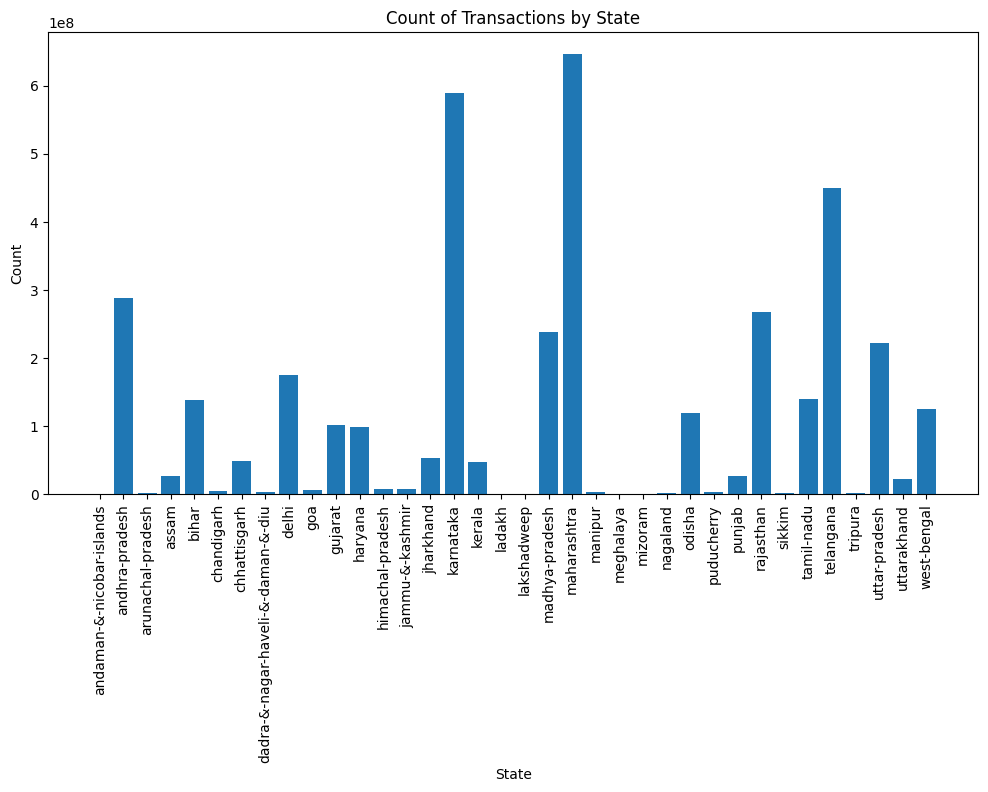

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called "df"
plt.figure(figsize=(12, 6))
plt.bar(df['state'], df['count'])
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Transactions by State')
plt.xticks(rotation=90)
plt.show()


**Above graph its shows that highest count in maharastra**

****

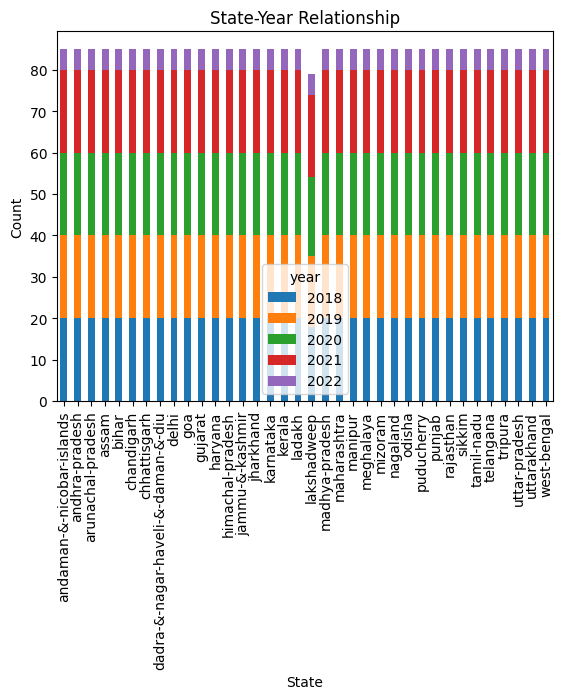

In [ ]:
import matplotlib.pyplot as plt

# Bar chart
df.groupby(['state', 'year']).size().unstack().plot(kind='bar', stacked=True)
plt.title('State-Year Relationship')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


**To group the data by state and perform some analysis, you can use the groupby function:**

In [ ]:
# Group by state and calculate total count and amount
state_grouped = df.groupby('state').agg({'count': 'sum', 'amount': 'sum'}).reset_index()
state_grouped.head()


,state,count,amount
0,andaman-&-nicobar-islands,3104200,9.013483e+09
1,andhra-pradesh,3317981633,7.295095e+12
2,arunachal-pradesh,15145432,4.270156e+10
3,assam,261992669,5.935746e+11
4,bihar,1430832381,3.167425e+12


<ipython-input-44-efc317dbb462>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(states, rotation=45)


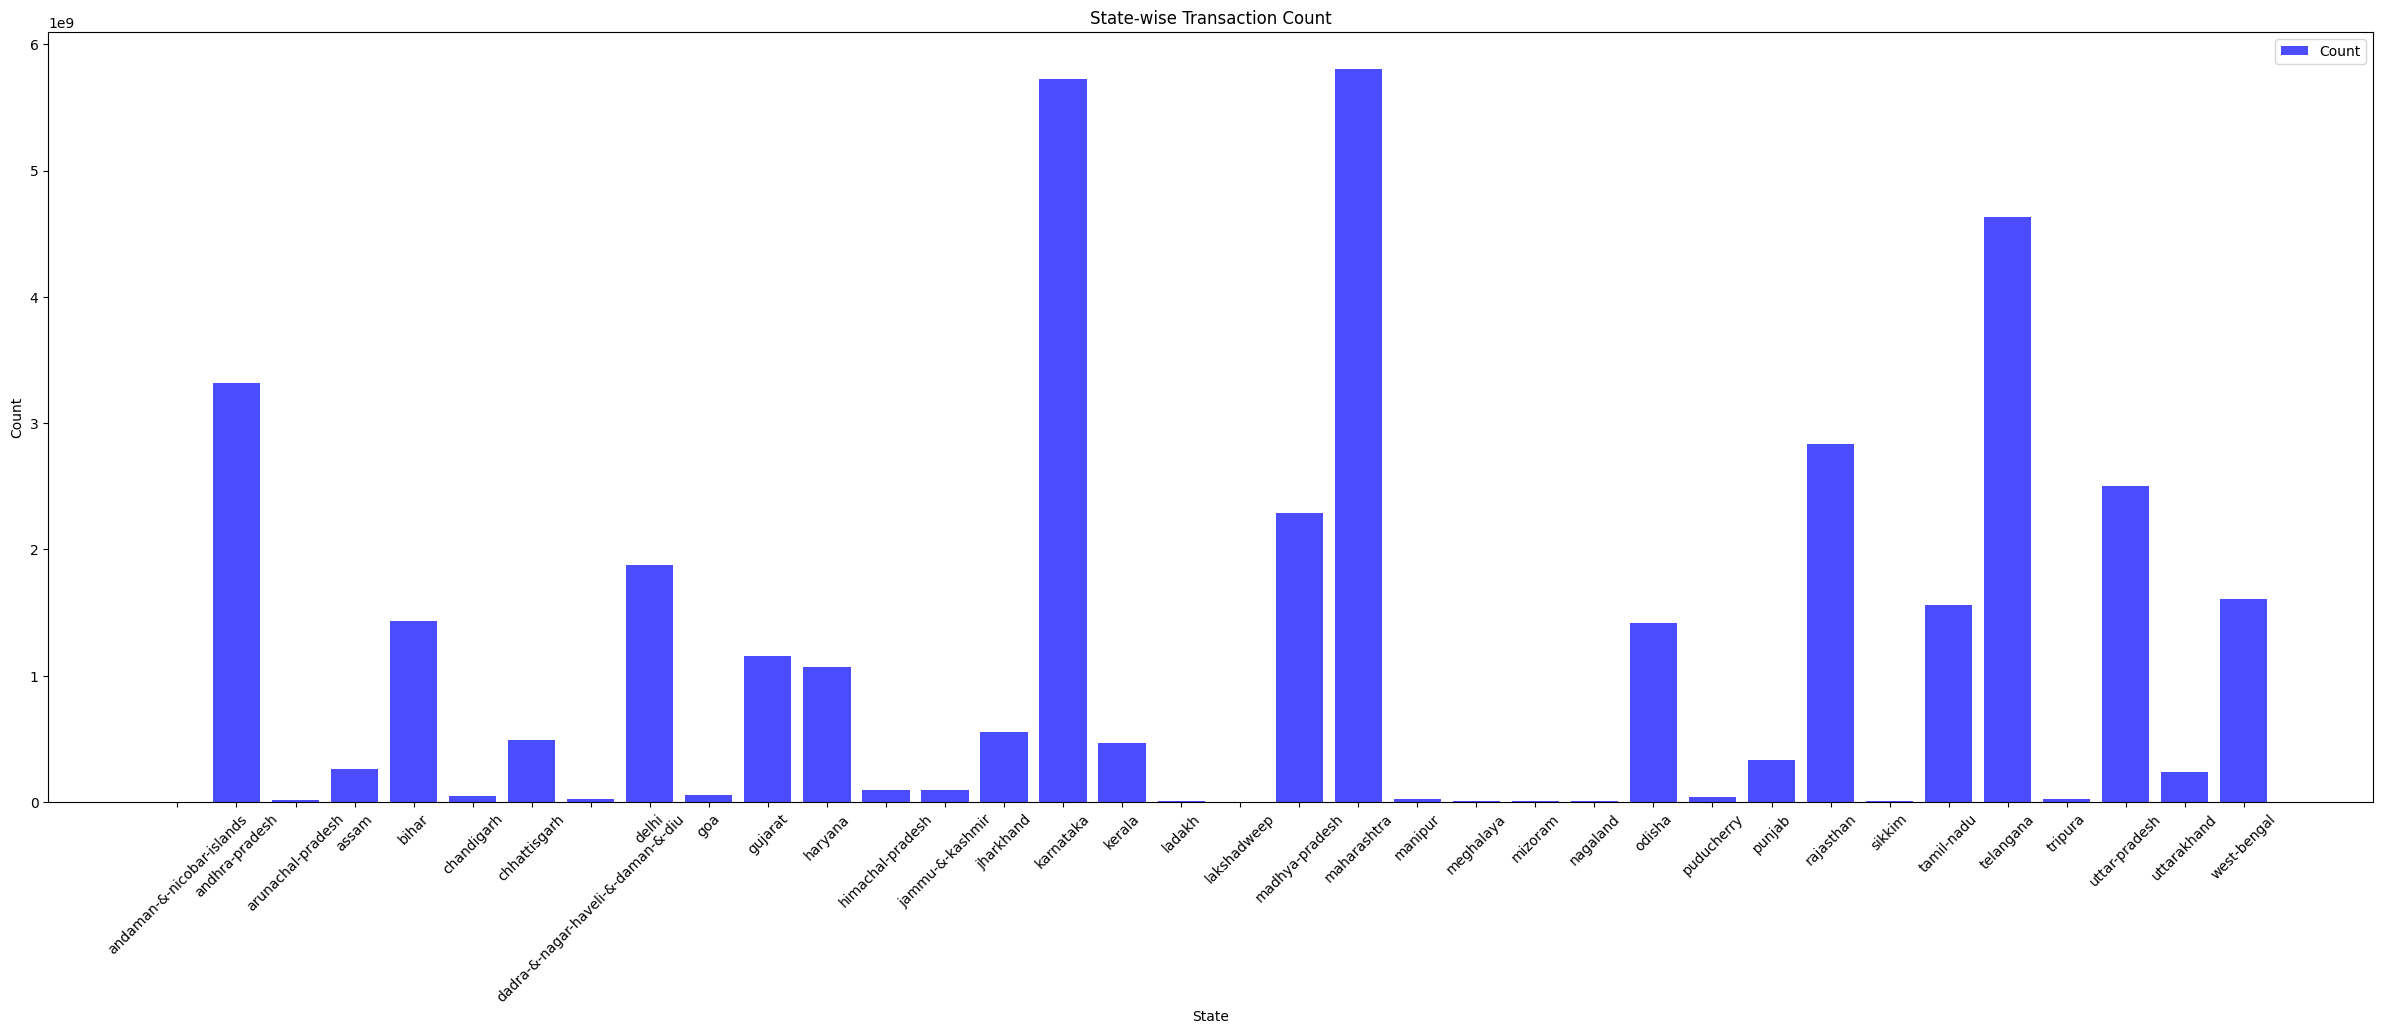

In [ ]:
import matplotlib.pyplot as plt

# Data
states = state_grouped['state']
count = state_grouped['count']
amount = state_grouped['amount']

# Plotting
fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(states, count, label='Count', color='blue', alpha=0.7)
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.set_title('State-wise Transaction Count')
ax.set_xticklabels(states, rotation=45)
ax.legend()
plt.show()

# Create a twin y-axis for amount
ax2 = ax.twinx()
ax2.plot(states, amount, label='Amount', color='green', marker='o')
ax2.set_ylabel('Amount')
ax2.legend()

plt.show()


**Buissness Analysis of final_agg_transaction**

**1) Total Transaction Volume**

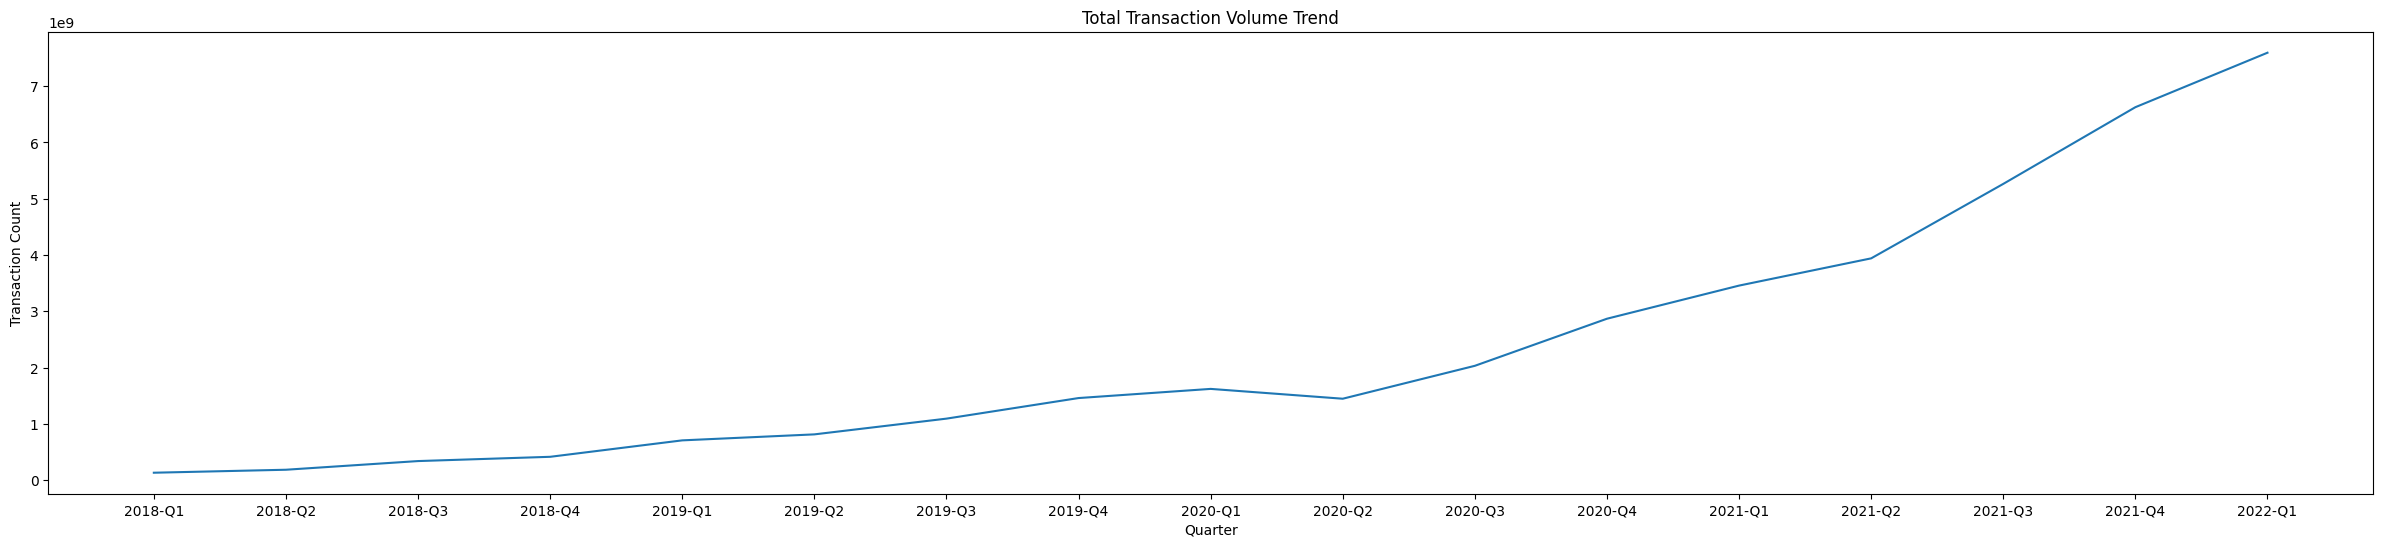

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate total count of transactions by year and quarter
transaction_count = final_agg_transaction.groupby(['year', 'quarter'])['count'].sum().reset_index()

# Visualize the trend of total transaction count
plt.figure(figsize=(30, 6))
plt.plot(transaction_count.index, transaction_count['count'])
plt.xlabel('Quarter')
plt.ylabel('Transaction Count')
plt.title('Total Transaction Volume Trend')
plt.xticks(transaction_count.index, transaction_count['year'].astype(str) + '-Q' + transaction_count['quarter'].astype(str))
plt.show()


*Note :: transaction increases year by year in final_agg_transaction dataset*

**2) Revenue Analysis**

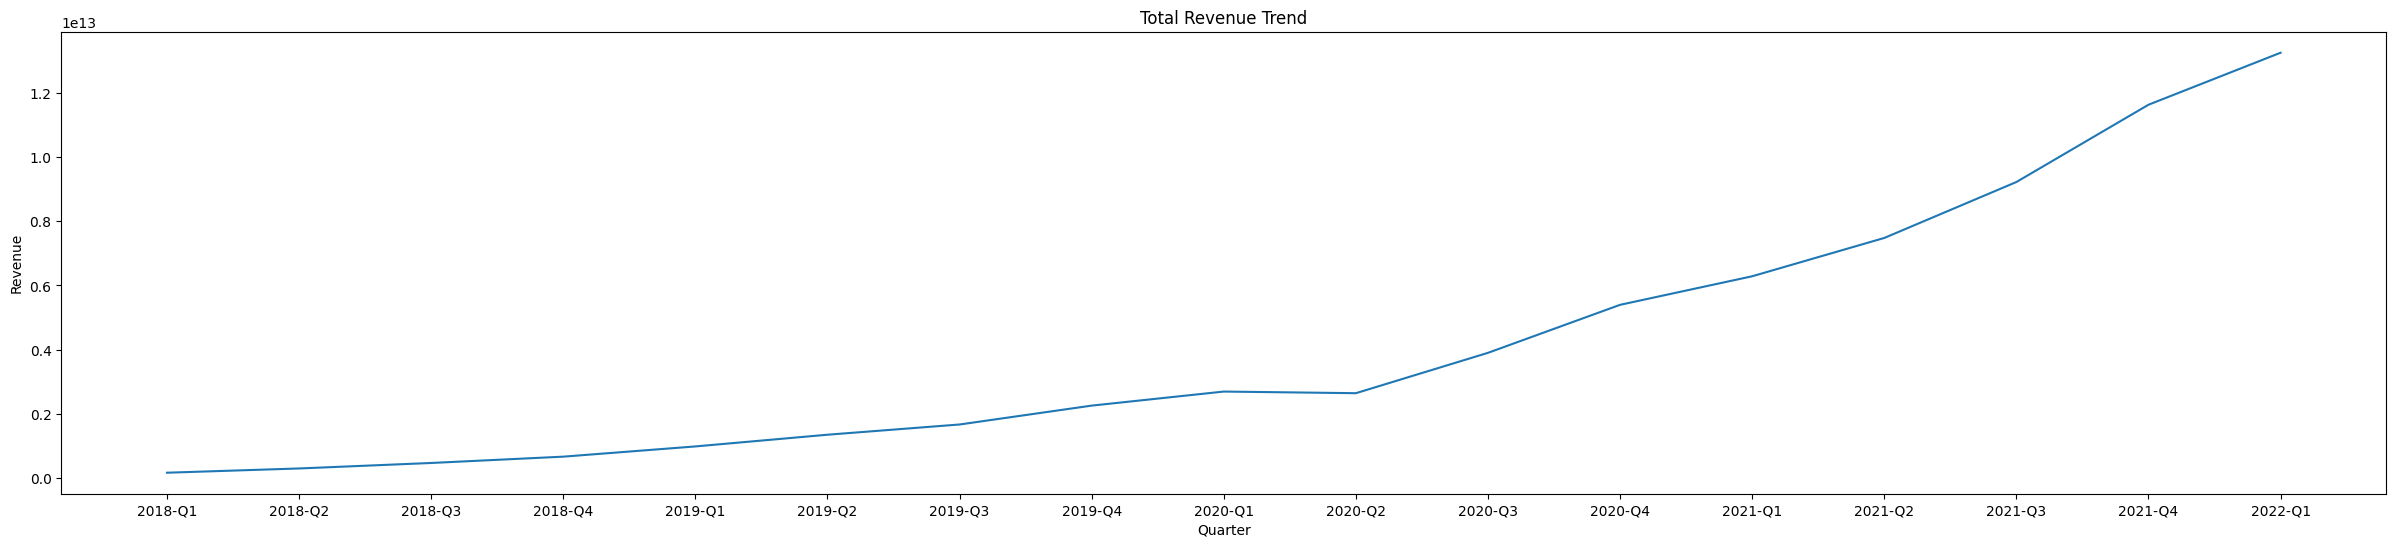

In [ ]:
# Calculate total revenue by year and quarter
revenue = final_agg_transaction.groupby(['year', 'quarter'])['amount'].sum().reset_index()

# Visualize the trend of total revenue
plt.figure(figsize=(30, 6))
plt.plot(revenue.index, revenue['amount'])
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.title('Total Revenue Trend')
plt.xticks(revenue.index, revenue['year'].astype(str) + '-Q' + revenue['quarter'].astype(str))
plt.show()

# Identify top revenue-generating categories
top_categories = final_agg_transaction.groupby('name')['amount'].sum().nlargest(5)


*Revenue in final_agg_transaction data show that revenue increasing gradually from 2018 to 2020.after 2020 it small fall of revenue and then increases rapidly*

**3) Transaction Distribution:**

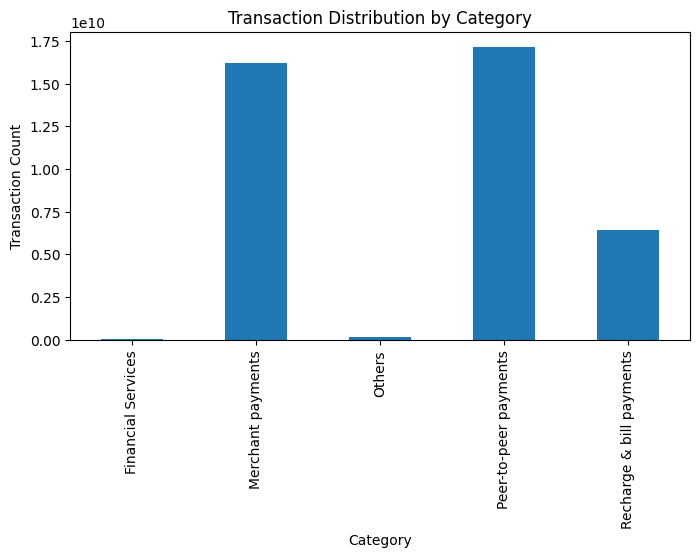

In [ ]:
# Calculate transaction count by category
transaction_distribution = final_agg_transaction.groupby('name')['count'].sum()

# Visualize transaction distribution
plt.figure(figsize=(8, 4))
transaction_distribution.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Transaction Count')
plt.title('Transaction Distribution by Category')
plt.show()

# Analyze transaction distribution across quarters
transaction_distribution_quarters = final_agg_transaction.groupby(['year', 'quarter', 'name'])['count'].sum().unstack().fillna(0)


*Transaction distribution shows that highest people transaction by peer to peer payment and Merchant payment .Also people less intrested in payment through financial services*

**4) Customer Behavior**

In [ ]:
# Identify top customers based on transaction count
top_customers_count = final_agg_transaction.groupby('name')['count'].sum().nlargest(10)

# Identify top customers based on transaction amount
top_customers_amount = final_agg_transaction.groupby('name')['amount'].sum().nlargest(10)

# Segment customers based on transaction patterns
customer_segments = pd.qcut(final_agg_transaction['amount'], q=[0, 0.2, 0.5, 0.8, 1], labels=['Low Value', 'Medium Value', 'High Value', 'Very High Value'])


In [ ]:
top_customers_count


name
Peer-to-peer payments       17168293808
Merchant payments           16177377847
Recharge & bill payments     6448178305
Others                        162478482
Financial Services             59285104
Name: count, dtype: int64

In [ ]:
top_customers_amount

name
Peer-to-peer payments       5.772075e+13
Merchant payments           9.560048e+12
Recharge & bill payments    2.968903e+12
Others                      9.377496e+10
Financial Services          3.574630e+10
Name: amount, dtype: float64

In [ ]:
customer_segments

0             Low Value
1          Medium Value
2             Low Value
3             Low Value
4             Low Value
             ...       
3049    Very High Value
3050    Very High Value
3051    Very High Value
3052         High Value
3053         High Value
Name: amount, Length: 3054, dtype: category
Categories (4, object): ['Low Value' < 'Medium Value' < 'High Value' < 'Very High Value']

**5) Customer Satisfaction and Retention**

In [ ]:
# Calculate repeat transactions by customer
repeat_transactions = final_agg_transaction.groupby('name')['count'].apply(lambda x: (x > 1).sum())

# Calculate customer churn rate
churn_rate = (final_agg_transaction['name'].nunique() - repeat_transactions.sum()) / final_agg_transaction['name'].nunique() * 100


*following is repeat transaction*

In [ ]:
repeat_transactions

name
Financial Services          606
Merchant payments           612
Others                      612
Peer-to-peer payments       612
Recharge & bill payments    612
Name: count, dtype: int64

In [ ]:
churn_rate

-60979.99999999999

********************************************************************************

***********************************************************************************************

#***Data Analysis on final_agg_user***#




In [ ]:
final_agg_user.head(5)

,Unnamed: 0,brand,count,percentage,state,year,quarter
0,0,Xiaomi,1665,0.247033,andaman-&-nicobar-islands,2018,1
1,1,Samsung,1445,0.214392,andaman-&-nicobar-islands,2018,1
2,2,Vivo,982,0.145697,andaman-&-nicobar-islands,2018,1
3,3,Oppo,501,0.074332,andaman-&-nicobar-islands,2018,1
4,4,OnePlus,332,0.049258,andaman-&-nicobar-islands,2018,1


**data cleaning**

In [ ]:
# Data Cleaning
data = final_agg_user.drop('Unnamed: 0', axis=1)


In [ ]:
data.isnull().sum()

brand         0
count         0
percentage    0
state         0
year          0
quarter       0
dtype: int64

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6727    False
6728    False
6729    False
6730    False
6731    False
Length: 6732, dtype: bool

**Data Visualization - Count of Transactions by Brand**

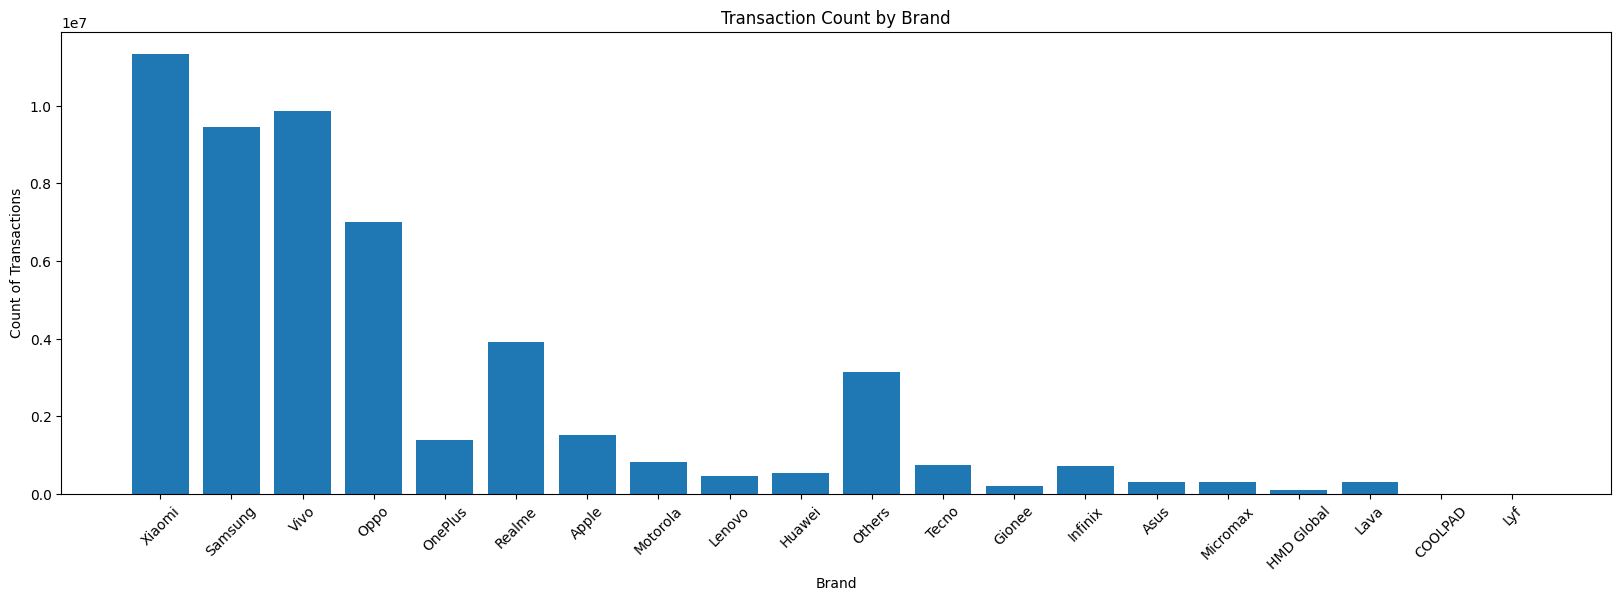

In [ ]:
# Data Visualization - Count of Transactions by Brand
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.bar(data['brand'], data['count'])
plt.xlabel('Brand')
plt.ylabel('Count of Transactions')
plt.title('Transaction Count by Brand')
plt.xticks(rotation=45)
plt.show()


*Xiaomi has huge count followed by samsung,vivo,oppo,others*

**Business Analysis**

In [ ]:
# Business Analysis
total_count = data['count'].sum()
data['market_share'] = data['count'] / total_count

# Identify the top brands based on market share
top_brands = data.nlargest(5, 'market_share')

# Print the top brands
print("Top Brands by Market Share:")
print(top_brands)


Top Brands by Market Share:
       brand     count  percentage        state       year  quarter  \
3916  Xiaomi  11340940    0.235154  maharashtra 2022-01-01        1   
3905  Xiaomi  10876133    0.239128  maharashtra 2021-01-01        4   
3894  Xiaomi  10369008    0.243511  maharashtra 2021-01-01        3   
3917    Vivo   9873983    0.204737  maharashtra 2022-01-01        1   
3883  Xiaomi   9764252    0.246170  maharashtra 2021-01-01        2   

      market_share  
3916      0.003277  
3905      0.003143  
3894      0.002997  
3917      0.002853  
3883      0.002822  


**Seasonal Trend Analysis**

In [ ]:
# Seasonal Trend Analysis
seasonal_trend = data.groupby(['year', 'quarter'])['count'].sum()

# Print the seasonal trend
print("\nSeasonal Trend Analysis:")
print(seasonal_trend)



Seasonal Trend Analysis:
year        quarter
2018-01-01  1           46877653
            2           63648009
            3           80010589
            4          102261621
2019-01-01  1          123432188
            2          141807654
            3          159293319
            4          178278417
2020-01-01  1          197574459
            2          218995596
            3          241168896
            4          264270434
2021-01-01  1          284984511
            2          305257101
            3          328353856
            4          351160262
2022-01-01  1          372950627
Name: count, dtype: int64


*seasonal trend shows that product sale incresed*

**Competitor Analysis**

In [ ]:
# Competitor Analysis
competitor_analysis = data.groupby('brand')['count'].sum()

# Print the competitor analysis
print("\nCompetitor Analysis:")
print(competitor_analysis)



Competitor Analysis:
brand
Apple          95947314
Asus            4295498
COOLPAD              10
Gionee          3082772
HMD Global       336632
Huawei         57129693
Infinix         5142870
Lava            1530109
Lenovo         42564548
Lyf                1271
Micromax       11132859
Motorola       73340734
OnePlus        63677211
Oppo          420250245
Others        282950234
Realme        219973222
Samsung       671603711
Tecno          12388623
Vivo          625415019
Xiaomi        869562617
Name: count, dtype: int64


From the Competitor Analysis, we can gather several insights about the brands in the dataset:

**Market Share**: The count of transactions provides an indication of market share. Brands with higher transaction counts, such as Xiaomi, Vivo, Samsung, and Oppo, have a larger presence in the market compared to others.

**Popular Brands**: Brands like Xiaomi, Vivo, Samsung, and Oppo have significantly higher transaction counts compared to other brands, suggesting that they are popular among consumers.

**Strong Competitors**: Apple, Motorola, and OnePlus have notable transaction counts, indicating they are strong competitors in the market.

**Diverse Brand Presence**: The analysis includes a range of brands, including both well-known global brands (Apple, Samsung) and local or regional brands (Micromax, Lava). This diversity suggests a mix of market dynamics and consumer preferences.

**Emerging Brands**: Realme and Tecno, although not as established as some of the other brands, have notable transaction counts, indicating their growing presence and popularity.










********************************************************************************************************************************

#***Data Analysis of final_map_transaction.csv***#

In [ ]:
final_map_transaction.head(5)

,Unnamed: 0,name,state,year,quarter,count,amount
0,0,north and middle andaman district,andaman-&-nicobar-islands,2018,1,442,9.316631e+05
1,1,south andaman district,andaman-&-nicobar-islands,2018,1,5688,1.256025e+07
2,2,nicobars district,andaman-&-nicobar-islands,2018,1,528,1.139849e+06
3,3,north and middle andaman district,andaman-&-nicobar-islands,2018,2,825,1.317863e+06
4,4,south andaman district,andaman-&-nicobar-islands,2018,2,9395,2.394824e+07


**Data Cleaning**

In [ ]:
import pandas as pd

# Read the data
df = pd.read_csv('final_map_transaction.csv')

# Check for missing values
missing_values = df.isnull().sum()
missing_values


Unnamed: 0    0
name          0
state         0
year          0
quarter       0
count         0
amount        0
dtype: int64

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Convert data types if needed
df['amount'] = df['amount'].astype(float)

# Perform any other necessary data cleaning steps

# Save the cleaned data to a new file
df.to_csv('cleaned_dataset.csv', index=False)


**Data Visualization**

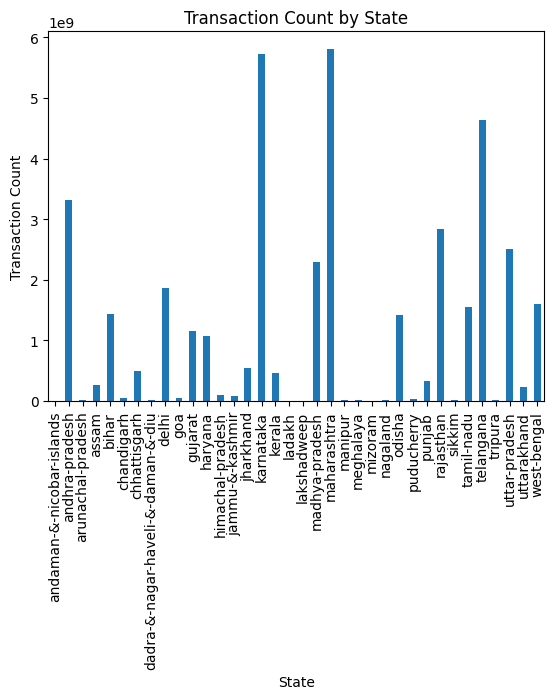

In [ ]:
import matplotlib.pyplot as plt

# Bar plot of transaction count by state
state_counts = df.groupby('state')['count'].sum()
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by State')
plt.show()


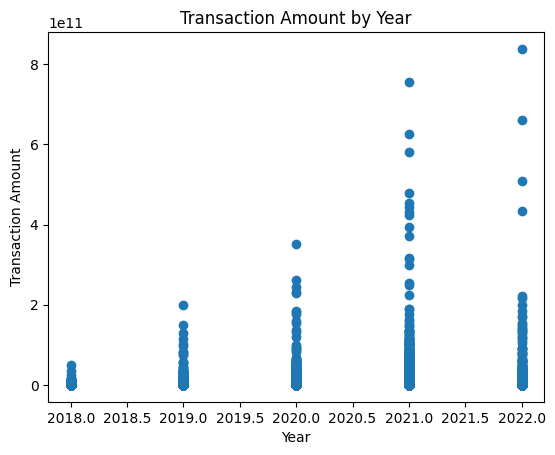

In [ ]:
# Scatter plot of transaction amount by year
plt.scatter(df['year'], df['amount'])
plt.xlabel('Year')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Year')
plt.show()


**Business Analysis**

In [ ]:
# Calculate the total transaction count by state
state_counts = df.groupby('state')['count'].sum()

# Calculate the total transaction amount by state
state_amounts = df.groupby('state')['amount'].sum()

# Calculate the average transaction amount by state
state_avg_amounts = df.groupby('state')['amount'].mean()

# Display the results
state_analysis = pd.DataFrame({
    'Transaction Count': state_counts,
    'Total Amount': state_amounts,
    'Average Amount': state_avg_amounts
})
state_analysis


,Transaction Count,Total Amount,Average Amount
state,,,
andaman-&-nicobar-islands,3104200,9.013483e+09,1.767350e+08
andhra-pradesh,3317981633,7.295095e+12,3.300948e+10
arunachal-pradesh,15145432,4.270156e+10,1.014289e+08
assam,261992669,5.935746e+11,1.058065e+09
bihar,1430832381,3.167425e+12,4.903135e+09
chandigarh,48665314,9.507654e+10,5.592738e+09
chhattisgarh,488277273,8.144876e+11,1.774483e+09
dadra-&-nagar-haveli-&-daman-&-diu,24551543,3.476761e+10,6.817179e+08
delhi,1873474952,3.059461e+12,1.636075e+10


observe that Uttar Pradesh has the highest transaction count of 2,501,368,952, indicating a high volume of business activity in the state.

Total Amount: The total transaction amount for each state is given. Maharashtra has the highest total transaction amount of 8.607010e+12, indicating a significant monetary value of transactions in the state.

Average Amount: The average transaction amount for each state is provided. Telangana has the highest average transaction amount of 1.584123e+10, indicating a relatively higher average transaction value per transaction in the state.

it shows that Uttar Pradesh, Maharashtra, and Telangana are important states in terms of business activity, transaction volume, and transaction value. These insights can help businesses target these states for marketing, sales, and expansion strategies. 

*************************************************************************************************************************************************************************************************

#***Data Analysis final_map_user_new.csv***#


In [ ]:
final_map_user_new.head(5)

,Unnamed: 0,index,registeredUsers,appOpens,state,year,quarter
0,0,north and middle andaman district,632,0,andaman-&-nicobar-islands,2018,1
1,1,south andaman district,5846,0,andaman-&-nicobar-islands,2018,1
2,2,nicobars district,262,0,andaman-&-nicobar-islands,2018,1
3,3,north and middle andaman district,911,0,andaman-&-nicobar-islands,2018,2
4,4,south andaman district,8143,0,andaman-&-nicobar-islands,2018,2


**Data Cleaning**

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv("final_map_user_new.csv")

# Remove unnecessary column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Replace '-' with space in the state column
df["state"] = df["state"].str.replace("-", " ")


**Data Visualization**

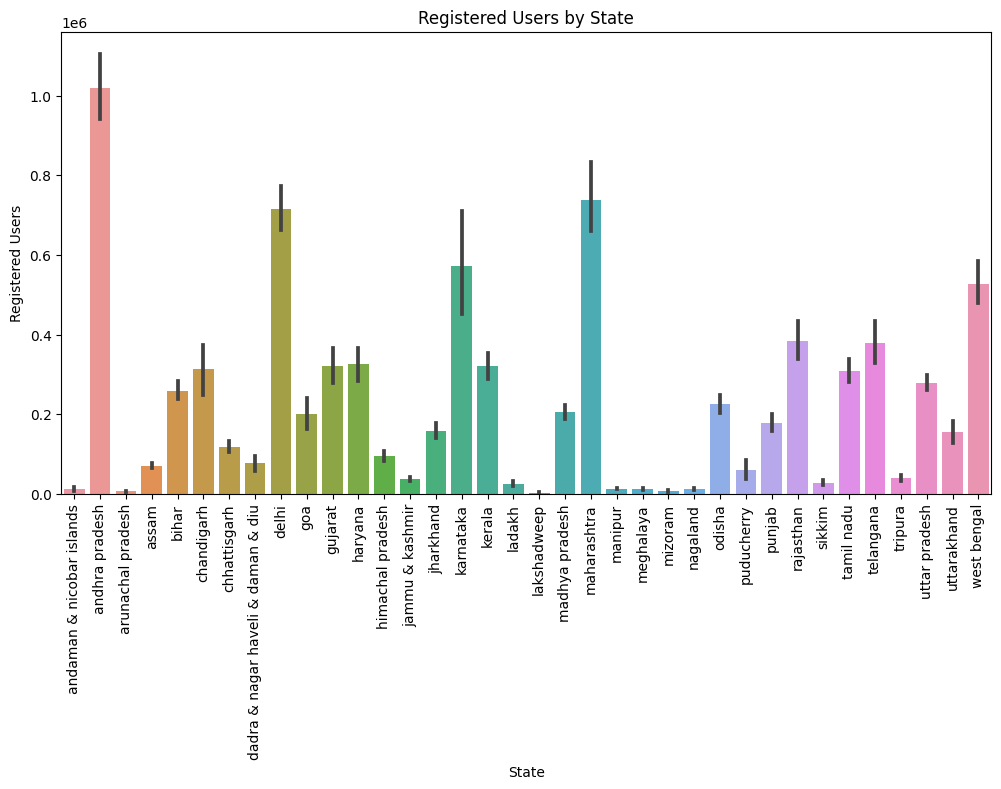

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of registered users by state
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="state", y="registeredUsers")
plt.title("Registered Users by State")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Registered Users")
plt.show()

This graph shows that andra pradesh has greate demand of app and also demand high in delhi,karnataka,maharastra,west bengal.
App market needed to strong in arunachal pradesh,assam,diu,kashmir,ladakhlakshwdeep.

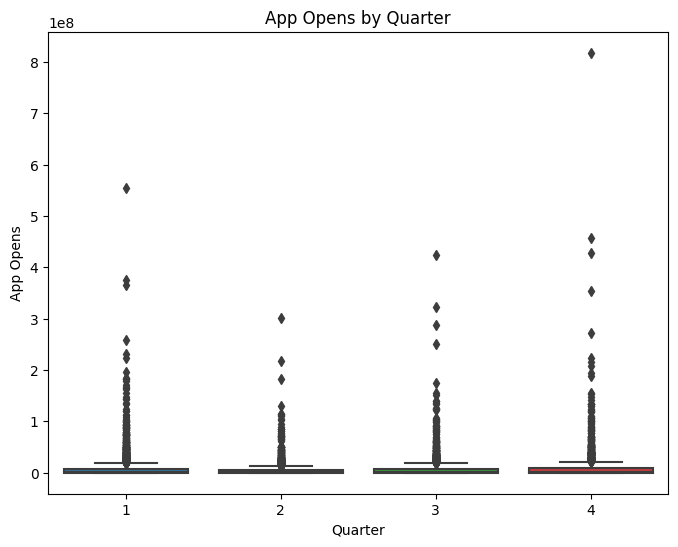

In [ ]:
# Box plot of app opens by quarter
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="quarter", y="appOpens")
plt.title("App Opens by Quarter")
plt.xlabel("Quarter")
plt.ylabel("App Opens")
plt.show()

**Business Analysis**

In [ ]:
# Calculate the total registered users and app opens by state
total_users = df.groupby("state")["registeredUsers"].sum()
total_opens = df.groupby("state")["appOpens"].sum()

# Calculate the average number of registered users and app opens by quarter
avg_users = df.groupby("quarter")["registeredUsers"].mean()
avg_opens = df.groupby("quarter")["appOpens"].mean()

# Print the business analysis results
print("Total registered users by state:")
print(total_users)
print("\nTotal app opens by state:")
print(total_opens)
print("\nAverage registered users by quarter:")
print(avg_users)
print("\nAverage app opens by quarter:")
print(avg_opens)


Total registered users by state:
state
andaman & nicobar islands                623446
andhra pradesh                        225414835
arunachal pradesh                       2805570
assam                                  39481411
bihar                                 167266170
chandigarh                              5335570
chhattisgarh                           54136914
dadra & nagar haveli & daman & diu      3896519
delhi                                 133679039
goa                                     6844584
gujarat                               180731308
haryana                               121872882
himachal pradesh                       19411836
jammu & kashmir                        14122428
jharkhand                              64541996
karnataka                             291372780
kerala                                 76662576
ladakh                                   840584
lakshadweep                               51138
madhya pradesh                        180662446
m

Total registered users: 
(The states with the highest number of registered users are)

Maharashtra: 452,075,011
Uttar Pradesh: 355,969,633
Karnataka: 291,372,780


---


Total app opens: 
(The states with the highest number of app opens are)


Maharashtra: 11,900,265,171
Uttar Pradesh: 6,561,653,317
Telangana: 8,421,807,185


---


Average registered users by quarter: 
The average number of registered users is relatively consistent across all quarters, ranging from around 249,000 to 306,000.


---


Average app opens by quarter: The average number of app opens increases gradually from the first quarter to the fourth quarter, with the highest average of around 9,199,000 in the fourth quarter.

************************************************************************************************************************************

#***Data Analysis final_top_user.csv.csv***#






In [ ]:
final_top_user.head(5)

,Unnamed: 0,name,registeredUsers,state,year,quarter
0,0,south andaman,5846,andaman-&-nicobar-islands,2018,1
1,1,north and middle andaman,632,andaman-&-nicobar-islands,2018,1
2,2,nicobars,262,andaman-&-nicobar-islands,2018,1
3,3,744103,1608,andaman-&-nicobar-islands,2018,1
4,4,744101,1108,andaman-&-nicobar-islands,2018,1


**Data Cleaning**

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv("final_top_user.csv")

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0"])

# Handle missing values (if any)
# For example, filling missing values with zeros
df = df.fillna(0)

# Print the cleaned dataset
print(df)


                           name  registeredUsers                      state  \
0                 south andaman             5846  andaman-&-nicobar-islands   
1      north and middle andaman              632  andaman-&-nicobar-islands   
2                      nicobars              262  andaman-&-nicobar-islands   
3                        744103             1608  andaman-&-nicobar-islands   
4                        744101             1108  andaman-&-nicobar-islands   
...                         ...              ...                        ...   
11096                    700015            93175                west-bengal   
11097                    742304            91059                west-bengal   
11098                    721101            90324                west-bengal   
11099                    700091            88432                west-bengal   
11100                    700150            87552                west-bengal   

       year  quarter  
0      2018        1  
1    

**Data Visualization**

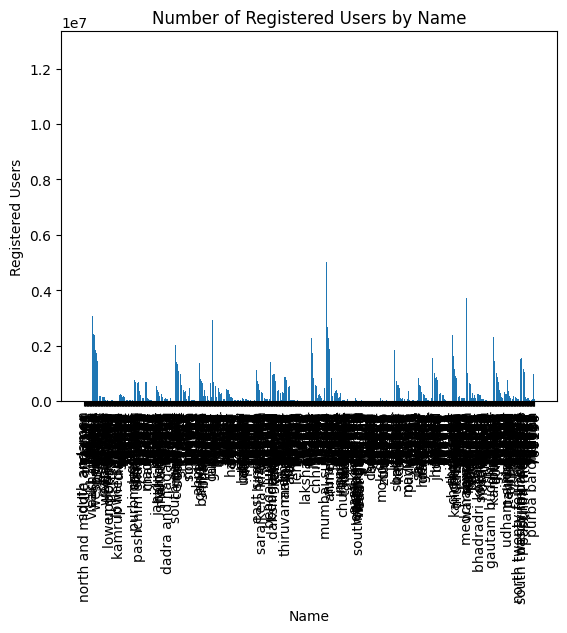

In [ ]:
import matplotlib.pyplot as plt

# Bar chart - Number of registered users by name
plt.bar(df["name"], df["registeredUsers"])
plt.xlabel("Name")
plt.ylabel("Registered Users")
plt.title("Number of Registered Users by Name")
plt.xticks(rotation=90)
plt.show()



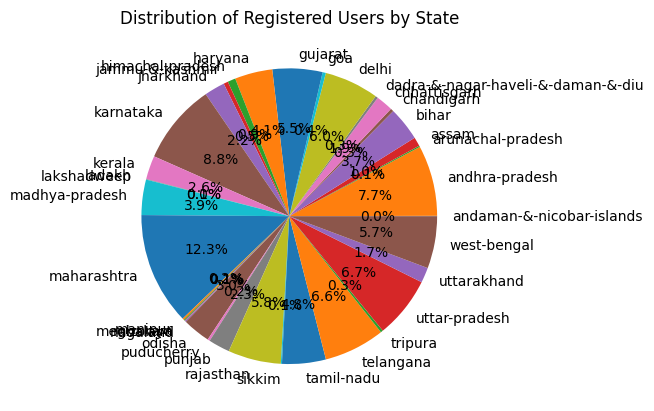

<Figure size 5000x5000 with 0 Axes>

In [ ]:
#Pie chart - Distribution of registered users by state
plt.pie(df.groupby("state")["registeredUsers"].sum(), labels=df["state"].unique(), autopct='%1.1f%%')
plt.title("Distribution of Registered Users by State")
plt.figure(figsize=(50, 50))
plt.show()


**Business Analysis**

In [ ]:
# Total registered users by state
total_registered_users = df.groupby("state")["registeredUsers"].sum()
print("Total registered users by state:")
print(total_registered_users)

# User growth rate over time
user_growth_rate = df.groupby(["year", "quarter"])["registeredUsers"].sum().pct_change()
print("User growth rate over time:")
print(user_growth_rate)

# Regional analysis - Compare registered users in different states
state_user_counts = df.groupby("state")["registeredUsers"].sum()
highest_registered_users = state_user_counts.idxmax()
lowest_registered_users = state_user_counts.idxmin()
print("State with the highest registered users:", highest_registered_users)
print("State with the lowest registered users:", lowest_registered_users)

# Quarterly performance - Average registered users per quarter
average_registered_users_per_quarter = df.groupby("quarter")["registeredUsers"].mean()
print("Average registered users per quarter:")
print(average_registered_users_per_quarter)


Total registered users by state:
state
andaman-&-nicobar-islands               1169886
andhra-pradesh                        212644718
arunachal-pradesh                       3939753
assam                                  27042040
bihar                                 101677507
chandigarh                              9412494
chhattisgarh                           51095266
dadra-&-nagar-haveli-&-daman-&-diu      7793038
delhi                                 163800763
goa                                     9782196
gujarat                               150336123
haryana                               113392874
himachal-pradesh                       23789681
jammu-&-kashmir                        13514721
jharkhand                              61876957
karnataka                             242383369
kerala                                 71063314
ladakh                                  1622251
lakshadweep                              102276
madhya-pradesh                        106392643
m

The analysis reveals that Maharashtra has the highest number of registered users, while Lakshadweep has the lowest. This information can be valuable for businesses to prioritize their operations, marketing efforts, and resource allocation based on the user density in different states

***************************************************************************************************************************

#***Data Ananlysis of final_transaction_top***#

In [ ]:
final_transaction_top.head(5)

,Unnamed: 0,entityName,state,year,quarter,count,amount
0,0,south andaman,andaman-&-nicobar-islands,2018,1,5688,1.256025e+07
1,1,nicobars,andaman-&-nicobar-islands,2018,1,528,1.139849e+06
2,2,north and middle andaman,andaman-&-nicobar-islands,2018,1,442,9.316631e+05
3,3,744101,andaman-&-nicobar-islands,2018,1,1622,2.769298e+06
4,4,744103,andaman-&-nicobar-islands,2018,1,1223,2.238042e+06


**Data Cleaning**

In [ ]:
import pandas as pd

# Read the data
data = pd.read_csv("final_transaction_top.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values:")
print(missing_values)

# Remove rows with missing values
data = data.dropna()

# Check for duplicates
duplicates = data.duplicated()
print("\nDuplicate rows:")
print(data[duplicates])

# Remove duplicate rows
data = data.drop_duplicates()

# Display the cleaned data
print("\nCleaned Data:")
print(data)



Missing values:
Unnamed: 0    0
entityName    2
state         0
year          0
quarter       0
count         0
amount        0
dtype: int64

Duplicate rows:
Empty DataFrame
Columns: [Unnamed: 0, entityName, state, year, quarter, count, amount]
Index: []

Cleaned Data:
       Unnamed: 0                entityName                      state  year  \
0               0             south andaman  andaman-&-nicobar-islands  2018   
1               1                  nicobars  andaman-&-nicobar-islands  2018   
2               2  north and middle andaman  andaman-&-nicobar-islands  2018   
3               3                    744101  andaman-&-nicobar-islands  2018   
4               4                    744103  andaman-&-nicobar-islands  2018   
...           ...                       ...                        ...   ...   
11095       11095                    742149                west-bengal  2022   
11096       11096                    700135                west-bengal  2022   
11097    

**Data Visualization**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt


In [ ]:
# Data Visualization
plt.figure(figsize=(40, 6))


<Figure size 4000x600 with 0 Axes>

<Figure size 4000x600 with 0 Axes>

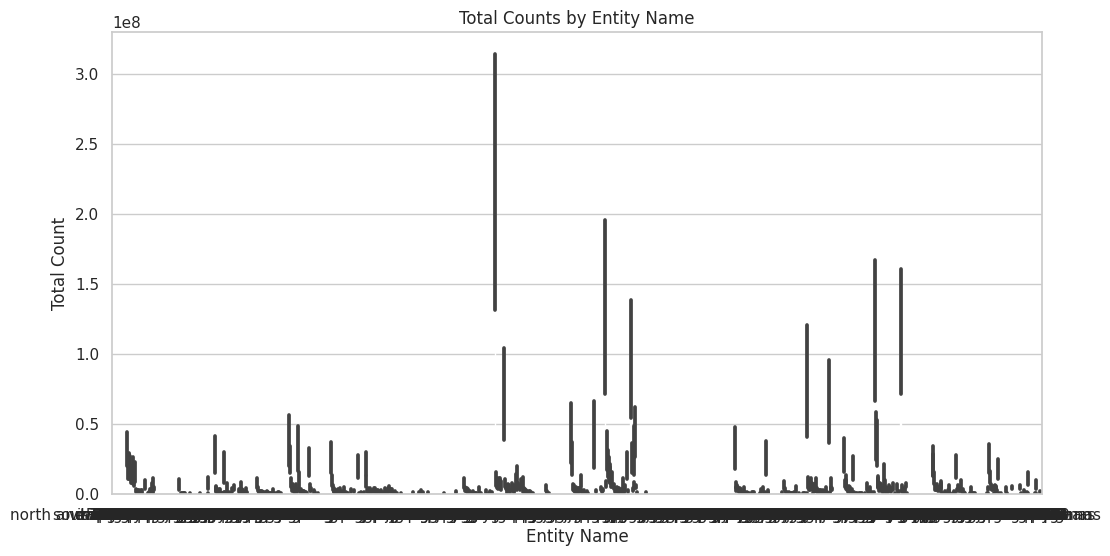

In [ ]:
# Data Visualization
sns.set(style="whitegrid")

# Bar plot of count by entityName
plt.figure(figsize=(12, 6))
sns.barplot(x='entityName', y='count', data=data)
plt.xlabel('Entity Name')
plt.ylabel('Total Count')
plt.title('Total Counts by Entity Name')
plt.show()


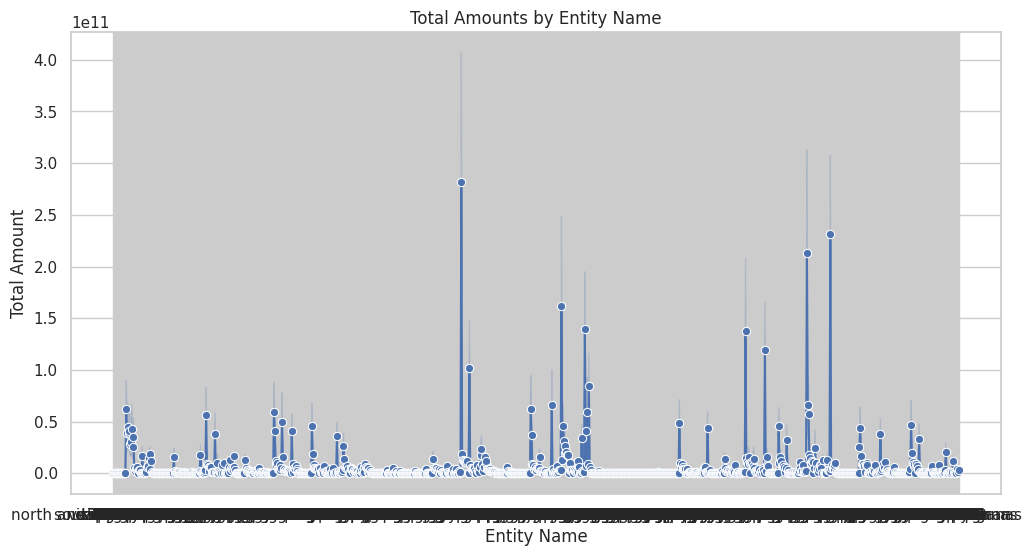

In [ ]:
# Line plot of amount by entityName
plt.figure(figsize=(12, 6))
sns.lineplot(x='entityName', y='amount', data=data, marker='o')
plt.xlabel('Entity Name')
plt.ylabel('Total Amount')
plt.title('Total Amounts by Entity Name')
plt.show()

**Buissness Analysis**

In [ ]:
# State with the highest total count
state_highest_count = data.groupby('state')['count'].sum().idxmax()

# State with the highest total amount
state_highest_amount = data.groupby('state')['amount'].sum().idxmax()

# Average count per quarter
average_count_per_quarter = data.groupby('quarter')['count'].mean()

# Average amount per quarter
average_amount_per_quarter = data.groupby('quarter')['amount'].mean()

print("State with the highest total count:", state_highest_count)
print("State with the highest total amount:", state_highest_amount)
print("\nAverage count per quarter:")
print(average_count_per_quarter)
print("\nAverage amount per quarter:")
print(average_amount_per_quarter)


State with the highest total count: karnataka
State with the highest total amount: telangana

Average count per quarter:
quarter
1    4.690376e+06
2    2.727290e+06
3    3.777569e+06
4    4.825615e+06
Name: count, dtype: float64

Average amount per quarter:
quarter
1    7.722555e+09
2    4.879506e+09
3    6.391047e+09
4    8.092287e+09
Name: amount, dtype: float64


State with the highest total count: Karnataka.
This indicates that Karnataka has the highest overall count among all states in the dataset

---
State with the highest total amount: Telangana.
This indicates that Telangana has the highest overall amount among all states in the dataset. 

---


